In [1]:
import pandas as pd
import numpy as np

In [2]:
dataset = pd.read_csv('data/fullDF.csv', index_col=0)
dataset = dataset.drop(['GRID_TYPE'], axis=1)

In [3]:
x_locations = dataset['LOC_X']
y_locations = dataset['LOC_Y']

In [4]:
min(x_locations)

-278.0998

In [5]:
max(x_locations)

281.119

In [6]:
min(y_locations)

-100.6526

In [7]:
max(y_locations)

422.4871

In [8]:
y_locations

2732     125.2763
12130     -5.5908
74191     78.5379
19621    238.1948
66474    139.8303
           ...   
70944    217.1834
76301    206.2505
48761    246.5670
2308      50.1469
77313     58.2601
Name: LOC_Y, Length: 84467, dtype: float64

In [9]:
len(dataset)

84467

In [10]:
dataset.columns

Index(['ACTION_TYPE', 'EVENTTIME', 'HTM', 'LOC_X', 'LOC_Y',
       'MINUTES_REMAINING', 'PERIOD', 'PLAYER_ID', 'PLAYER_NAME', 'QUARTER',
       'SECONDS_REMAINING', 'SHOT_ATTEMPTED_FLAG', 'SHOT_DISTANCE',
       'SHOT_MADE_FLAG', 'SHOT_TIME', 'SHOT_TYPE', 'SHOT_ZONE_AREA',
       'SHOT_ZONE_BASIC', 'SHOT_ZONE_RANGE', 'TEAM_ID', 'TEAM_NAME', 'VTM',
       'PLAYER_AVG'],
      dtype='object')

In [11]:
dataset.head()

,ACTION_TYPE,EVENTTIME,HTM,LOC_X,LOC_Y,MINUTES_REMAINING,PERIOD,PLAYER_ID,PLAYER_NAME,QUARTER,...,SHOT_MADE_FLAG,SHOT_TIME,SHOT_TYPE,SHOT_ZONE_AREA,SHOT_ZONE_BASIC,SHOT_ZONE_RANGE,TEAM_ID,TEAM_NAME,VTM,PLAYER_AVG
2732,Jump Shot,5,GSW,-215.9249,125.2763,0,2,201939,Stephen Curry,2.0,...,0,7.80,3PT Field Goal,Left Side Center(LC),Above the Break 3,24+ ft.,1610612744,Golden State Warriors,MIL,0.510288
12130,Running Dunk Shot,80,HOU,222.7641,-5.5908,1,1,201147,Corey Brewer,1.0,...,1,65.37,2PT Field Goal,Center(C),Restricted Area,Less Than 8 ft.,1610612745,Houston Rockets,IND,0.357466
74191,Hook Shot,470,OKC,209.4920,78.5379,7,4,201586,Serge Ibaka,4.0,...,1,486.12,2PT Field Goal,Center(C),Restricted Area,Less Than 8 ft.,1610612760,Oklahoma City Thunder,MIN,0.508380
19621,Layup Shot,645,CHI,70.7910,238.1948,10,4,203087,Jeremy Lamb,4.0,...,0,614.75,2PT Field Goal,Center(C),Restricted Area,Less Than 8 ft.,1610612766,Charlotte Hornets,CHA,0.452555
66474,Jump Shot,447,SAS,-44.9422,139.8303,7,4,203900,Markel Brown,4.0,...,0,434.04,3PT Field Goal,Right Side Center(RC),Above the Break 3,24+ ft.,1610612751,Brooklyn Nets,BKN,0.244444


In [12]:
len(dataset.columns)

23

In [13]:
len(set(dataset['ACTION_TYPE']))

53

In [14]:
set(dataset['SHOT_TYPE'])

{'2PT Field Goal', '3PT Field Goal'}

In [15]:
set(dataset['PERIOD'])

{1, 2, 3, 4, 5, 6}

In [16]:
dataset[dataset['PLAYER_NAME'] == 'LeBron James']

,ACTION_TYPE,EVENTTIME,HTM,LOC_X,LOC_Y,MINUTES_REMAINING,PERIOD,PLAYER_ID,PLAYER_NAME,QUARTER,...,SHOT_MADE_FLAG,SHOT_TIME,SHOT_TYPE,SHOT_ZONE_AREA,SHOT_ZONE_BASIC,SHOT_ZONE_RANGE,TEAM_ID,TEAM_NAME,VTM,PLAYER_AVG
57474,Layup Shot,707,DET,60.2333,237.4419,11,3,2544,LeBron James,3.0,...,0,703.26,2PT Field Goal,Center(C),Restricted Area,Less Than 8 ft.,1610612739,Cleveland Cavaliers,CLE,0.490291
34656,Cutting Dunk Shot,424,CLE,-80.2639,76.1403,7,1,2544,LeBron James,1.0,...,1,427.90,2PT Field Goal,Center(C),Restricted Area,Less Than 8 ft.,1610612739,Cleveland Cavaliers,UTA,0.490291
75043,Driving Layup Shot,187,CLE,53.6429,244.2146,3,1,2544,LeBron James,1.0,...,0,184.02,2PT Field Goal,Center(C),Restricted Area,Less Than 8 ft.,1610612739,Cleveland Cavaliers,PHI,0.490291
39347,Driving Layup Shot,639,BKN,-137.8678,-5.7453,10,1,2544,LeBron James,1.0,...,0,603.90,2PT Field Goal,Center(C),Restricted Area,Less Than 8 ft.,1610612739,Cleveland Cavaliers,CLE,0.490291
27659,Driving Dunk Shot,175,GSW,-0.0338,45.6127,2,4,2544,LeBron James,4.0,...,1,192.00,2PT Field Goal,Center(C),Restricted Area,Less Than 8 ft.,1610612739,Cleveland Cavaliers,CLE,0.490291
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10742,Layup Shot,658,NYK,-11.3719,255.6134,10,2,2544,LeBron James,2.0,...,0,666.06,2PT Field Goal,Center(C),Restricted Area,Less Than 8 ft.,1610612739,Cleveland Cavaliers,CLE,0.490291
1257,Running Layup Shot,193,CLE,-65.4647,57.2498,3,4,2544,LeBron James,4.0,...,1,175.77,2PT Field Goal,Center(C),Restricted Area,Less Than 8 ft.,1610612739,Cleveland Cavaliers,NYK,0.490291
29310,Driving Layup Shot,158,DAL,-21.6574,0.4609,2,3,2544,LeBron James,3.0,...,1,160.91,2PT Field Goal,Center(C),Restricted Area,Less Than 8 ft.,1610612739,Cleveland Cavaliers,CLE,0.490291
57475,Fadeaway Jump Shot,446,DET,-194.6814,27.8240,7,3,2544,LeBron James,3.0,...,0,449.97,2PT Field Goal,Left Side(L),Mid-Range,8-16 ft.,1610612739,Cleveland Cavaliers,CLE,0.490291


In [17]:
import matplotlib.pyplot as plt

In [18]:
by_shot_distance = dataset.groupby('SHOT_DISTANCE')['SHOT_MADE_FLAG'].mean()
num_attempts_by_shot_distance = dataset.groupby('SHOT_DISTANCE')['SHOT_MADE_FLAG'].count()

In [19]:
x_values = by_shot_distance.index
y_values_percentages = by_shot_distance.values * 100
y_values_counts = num_attempts_by_shot_distance.values

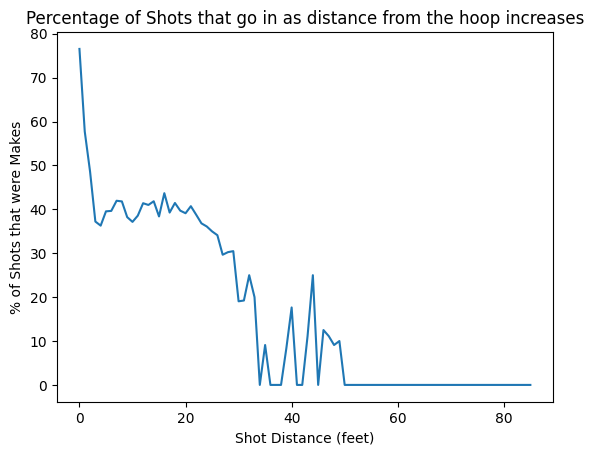

In [20]:
plt.plot(x_values, y_values_percentages)
plt.xlabel('Shot Distance (feet)')
plt.ylabel('% of Shots that were Makes')
plt.title('Percentage of Shots that go in as distance from the hoop increases')
plt.show()

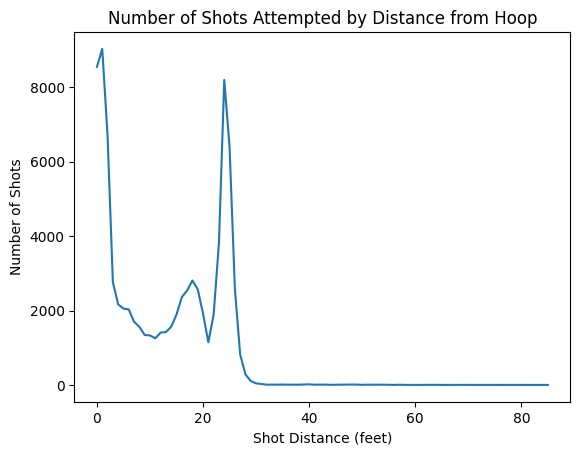

In [21]:
plt.plot(x_values, y_values_counts)
plt.xlabel('Shot Distance (feet)')
plt.ylabel('Number of Shots')
plt.title('Number of Shots Attempted by Distance from Hoop')
plt.show()

In [22]:
y_values_percentages

array([76.54494382, 57.72681954, 48.61235452, 37.21940623, 36.28808864,
       39.54168698, 39.64497041, 41.95639364, 41.80537772, 38.22652757,
       37.14285714, 38.56573705, 41.3940256 , 40.99859353, 41.84261036,
       38.3843717 , 43.68108567, 39.26742812, 41.4468995 , 39.70416504,
       39.11227154, 40.71490846, 38.78306878, 36.80355742, 36.09517999,
       34.97652582, 34.10762679, 29.65686275, 30.24911032, 30.47619048,
       19.04761905, 19.23076923, 25.        , 20.        ,  0.        ,
        9.09090909,  0.        ,  0.        ,  0.        ,  8.33333333,
       17.64705882,  0.        ,  0.        , 11.11111111, 25.        ,
        0.        , 12.5       , 11.11111111,  9.09090909, 10.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.  

In [23]:
y_values_counts

array([8544, 9027, 6702, 2762, 2166, 2051, 2028, 1697, 1562, 1342, 1330,
       1255, 1406, 1422, 1563, 1894, 2358, 2539, 2806, 2569, 1915, 1147,
       1890, 3823, 8195, 6390, 2583,  816,  281,  105,   42,   26,    8,
         10,    7,   11,    7,    8,    7,   12,   17,    7,    9,    9,
          4,    6,    8,    9,   11,   10,    3,    7,    6,    6,    7,
          5,    2,    6,    3,    2,    1,    3,    3,    1,    2,    2,
          2,    1,    2,    1,    2,    1,    1,    1,    1])

In [24]:
by_shot_distance[4]

np.float64(0.3628808864265928)

In [25]:
by_shot_distance[24]

np.float64(0.3609517998779744)

In [26]:
num_attempts_by_shot_distance[24]

np.int64(8195)

In [27]:
makes = dataset[dataset['SHOT_MADE_FLAG'] == 1]
misses = dataset[dataset['SHOT_MADE_FLAG'] == 0]
print(f"Out of {len(dataset)} total shots, {round(len(makes) / len(dataset) * 100, 2)}% were makes and {round(len(misses) / len(dataset) * 100, 2)}% were misses.")

Out of 84467 total shots, 44.83% were makes and 55.17% were misses.
